In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
from glob import glob  

In [2]:
df = pd.read_csv('file.csv')
df.drop(['Unnamed: 0', 'Length'], axis=1, inplace=True)
df.head(10)

,Filename,Label
0,0356dec7.wav,Acoustic_guitar
1,0eeaebcb.wav,Acoustic_guitar
2,10da16fb.wav,Acoustic_guitar
3,160c92d7.wav,Acoustic_guitar
4,16c9a838.wav,Acoustic_guitar
5,17f82c05.wav,Acoustic_guitar
6,2016d256.wav,Acoustic_guitar
7,236cbab1.wav,Acoustic_guitar
8,32dee61b.wav,Acoustic_guitar
9,34747922.wav,Acoustic_guitar


In [3]:
df.set_index('Filename', inplace=True)

for f in df.index:
  rate, signal = wavfile.read('./clean/' + f)
  df.at[f, 'Length'] = signal.shape[0]/rate


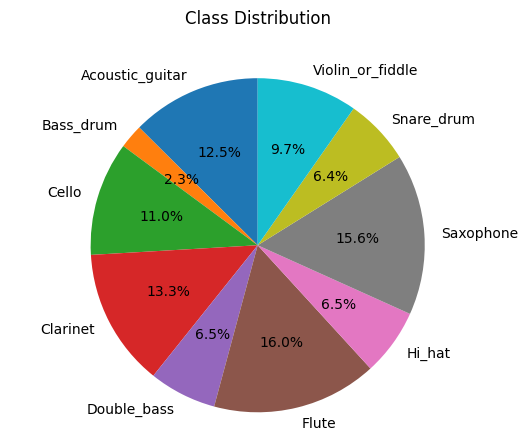

In [4]:
classes = list(np.unique(df.Label))
class_dist = df.groupby(['Label'])['Length'].mean()

fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten, LSTM, Dropout, Dense, TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

In [6]:
n_samples = 2*int(df.Length.sum()/0.1)
prob_dist = class_dist / class_dist.sum()
choices = np.random.choice(class_dist.index, p=prob_dist)

In [7]:
class Config:
  def __init__(self, mode='conv', nfilt=26, nfft=512, nfeat=13, rate=16000):
    self.mode = mode
    self.nfilt = nfilt
    self.nfeat = nfeat
    self.nfft = nfft
    self.rate = rate
    self.step = int(rate/10)

In [8]:
config = Config()

if config.mode == 'conv':
  pass
elif config.mode == 'time':
  pass
